### Curso: Tecnologia em Análise e Desenvolvimento de Sistemas
### Disciplina: Disruptive Architectures - IOT, IOB e IA
### Turmas: 2TDSPR, 2TDSPS e 2TDSPT
#### Prof. André Tritiack: prof.andrefarias@fiap.com.br
#### 2º Semestre de 2023

## CHECKPOINT 1 - Pontuação Máxima: 10.00 pontos

LEIA ATENTAMENTE AS INSTRUÇÕES:

1.	O trabalho deve ser realizado em grupo de até 5 (cinco) pessoas. Não precisa necessariamente ser o mesmo grupo do Challenge.

2. O conteúdo relacionado a este Checkpoint refere-se aos algoritmos de Aprendizado de Máquina Não Supervisionados de Agrupamento (K-Means) e Redução de Dimensionalidade (PCA - Principal Component Analysis).

3.	Você deverá submeter uma cópia deste arquivo notebook .ipynb com as respostas nos campos indicados e as saídas executadas. Anexe os arquivos auxiliares que utilizar.

4. É fundamental que sejam criadas células de texto e/ou comentários para suas respostas e apontamentos.

5.	Apenas um aluno submeterá o arquivo no Teams. Mude o nome do arquivo notebook para um nome com as iniciais do seu nome completo (de quem submeterá o arquivo), seguido do seu RM e "CP1". Exemplo: ATF12000 - CP1

6.	A entrega deverá ser feita até às 23h59 do dia 10/09/2023 na respectiva tarefa no Microsoft Teams.

7.	As pontuações das questões estão marcadas nos enunciados.

8.	Você pode usar trechos de códigos prontos, de fontes pesquisadas ou de notebooks das aulas, mas não copie de outros grupos. Se forem observados arquivos iguais ou muito semelhantes, ambos serão desconsiderados, tendo suas notas zeradas.

9. Tire suas dúvidas com o professor e não deixe a entrega para o último dia.


### Insira aqui o nome e o RM dos membros do grupo:

- Gustavo Guarnieri de Melo........................RM: 97100
- Gustavo Santos Nascimento.....................RM: 96687
- Vinícius Almeida Kotchetkoff....................RM: 96331
- Vinicius Rodrigues Brito.............................RM: 97473
- William Mendes Vulcano............................RM: 96939


In [1]:
# Bibliotecas utilizadas
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Questão 1 (2.50 pontos):

Utilizando o dataset "Mall Customers", disponível em https://www.kaggle.com/datasets/kandij/mall-customers, agrupar os clientes com base nas características de receita anual (Annual Income (k$)) e pontuação de gastos (Spending Score).

- Determine o valor ideal de k, com base no método Elbow.
- Treine o modelo e avalie a qualidade dos clusters, utilizando a métrica Silhoutte Score.

In [92]:
# Criando um dataframe
df_mall = pd.read_csv('/content/Mall_Customers.csv')
df_mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [93]:
# Selecionadno os clientes com base nas características
X = df_mall[['Annual Income (k$)', 'Spending Score (1-100)']]

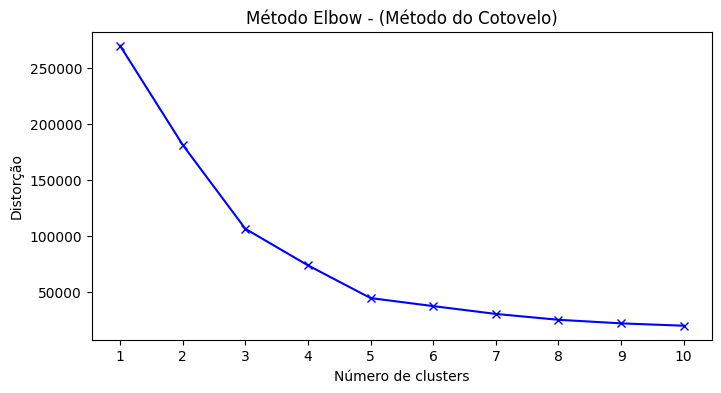

In [94]:
# Determinando o valor ideal de k, com base no método Elbow
variacoes = []

for k in range(1, 11):
    modelo = KMeans(n_clusters=k, random_state=50)
    modelo.fit(X)
    variacoes.append(modelo.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), variacoes, '-bx')
plt.title('Método Elbow - (Método do Cotovelo)')
plt.xlabel('Número de clusters')
plt.ylabel('Distorção')
plt.xticks(range(1, 11))
plt.show()

In [95]:
# Treinando o modelo e avaliando a qualidade de 3 clusters.
modelo01 = KMeans(n_clusters=3, random_state=50)
modelo01.fit(X)

silhouette_avg = silhouette_score(X, modelo01.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.46761358158775435


In [96]:
# Treinando o modelo e avaliando a qualidade de 4 clusters.
modelo02 = KMeans(n_clusters=4, random_state=50)
modelo02.fit(X)

silhouette_avg = silhouette_score(X, modelo02.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.4931963109249047


In [97]:
# Treinando o modelo e avaliando a qualidade de 5 clusters.
modelo03 = KMeans(n_clusters=5, random_state=50)
modelo03.fit(X)

silhouette_avg = silhouette_score(X, modelo03.labels_)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.553931997444648


In [98]:
nomes = ['Annual Income (k$)', 'Spending Score (1-100)']

In [99]:
# Realizando agrupamento
clusters = pd.DataFrame(df_mall, columns = nomes)
clusters['Annual Income (k$)'] = pd.to_numeric(clusters['Spending Score (1-100)'])
clusters['cluster'] = modelo03.labels_
clusters

,Annual Income (k$),Spending Score (1-100),cluster
0,39,39,4
1,81,81,2
2,6,6,4
3,77,77,2
4,40,40,4
...,...,...,...
195,79,79,3
196,28,28,0
197,74,74,3
198,18,18,0


In [51]:
# EXPLICAÇÃO DA QUESTÃO 1:

# Para resolver esse exercícios, primeiro criamos um DataFrame para que seja possível a leitura do arquivo CSV e,
# exibimos as primeiras linhas do dataset.

# Em seguida, selecionamos os clientes com base nas características, e armazenamos na variável X.
# Isso nos permitiu realizar uma análise para determinar o número ideal de clusters, usando o Método do Cotovelo.

# Após análisar o gráfico, decidimos treinar o modelo considerando a qualidade de diferentes agrupamentos.
# Dessa forma, treinamos o modelo com 3, 4 e 5 clusters.

# Ao comparar os resultados, observamos que o modelo com 5 clusters produziu o melhor Índice de Silhouette Score.

# E por fim, realizamos o agrupamento dos clientes com base nas características da receita anual e a pontuação de gastos.

# Questão 02 (1.50 pontos):

- Usando o dataset Iris, utilize a técnica de redução de dimensionalidade Principal Component Analysis (PCA) e apresente os resultados.

In [132]:
# Criando um dataframe
df_iris = pd.read_csv('/content/IRIS.csv')
df_iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [133]:
# Selecionando atributos
X = df_iris.iloc[:, 0:4].values

In [134]:
# Selecionando target
y = df_iris.iloc[:, 4].values

In [135]:
# Padronizando dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [136]:
# Separando os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.20)
X_treino.shape, X_teste.shape

((120, 4), (30, 4))

In [137]:
# Reduzindo o número original de colunas
p = 2
pca = PCA(n_components=p)

In [138]:
X_treino_pca = pca.fit_transform(X_treino)
X_teste_pca = pca.transform(X_teste)

X_treino_pca.shape, X_teste_pca.shape

((120, 2), (30, 2))

In [139]:
# calculando a porcentagem de variância dos dados
pca.explained_variance_ratio_

array([0.7483174 , 0.20955469])

In [140]:
# Explicação dos dados de entrada
total_variancia = pca.explained_variance_ratio_.sum()
print(f'O modelo PCA com {p} variáveis explica{100*(total_variancia): .2f} % dos dados de entrada')

O modelo PCA com 2 variáveis explica 95.79 % dos dados de entrada


In [141]:
# Instanciando o objeto
modelo_rfc = RandomForestClassifier(n_estimators=40, random_state=0)

#Treinando o modelo
modelo_rfc.fit(X_treino, y_treino)

# Realizando as previsões
previsoes = modelo_rfc.predict(X_teste)

In [142]:
previsoes

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [143]:
y_teste

array(['Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'], dtype=object)

In [144]:
# Calculando a acurácia
acuracia = accuracy_score(y_teste, previsoes)
print(f'A acurácia do modelo Random Forest é de:{(100*acuracia): .2f} %')

A acurácia do modelo Random Forest é de: 96.67 %


In [145]:
# EXPLICAÇÃO DA QUESTÃO 2:

# Para resolver esse exercícios, criamos o DataFrame para que seja possível a leitura do arquivo CSV e,
# exibimos as primeiras linhas do dataset.

# Selecionamos os atributos e colocamos na variavel X, e fizemos o mesmo com a coluna target e colocamos na variavel y.

# Utilizamos o StandardScaler para padronizar os dados.

# Em sequencia, dividimos os dados em duas partes para treinar o modelo em uma parte para testa-lo, justamente para
# verificar o desempenho do modelo.

# Utilizamos o PCA para reduzir a dimensionalidade dos dados para 2 componentes principais, tanto no conjunto de
# treinamento quanto no conjunto de teste, simplificando assim a representação dos dados.

# Tentamos reduzir a dimensionalidade dos dados com 1, 2 e 3 componentes, na qual todos apresentaram uma boa
# explicação dos dados de entrada e ótimas previsões. Porem, optamos por reduir em dois componetes, pois o modelo consegue
# explicar cerca de 95.79 % % dos dados de entrada e obteve uma acurácia de 96.67 %. Para chegar a essa conclusão utilizamos
# o Random Forest utilizado para tarefas de classificação, o que nesse caso foi utilizado para fazer previsões.


# Questão 03 (6.00 pontos):

- Escolher um dataset de sua preferência que possua ao menos uma coluna com valores categóricos para ser utilizada como "Target".

- Não utilize os datasets utilizados em aula (Mall Customers, Iris, House Power Consumption e Adult Census).

- Aplicar a técnica de redução de dimensionalidade, usando o algoritmo PCA.

- Com base no novo dataset (após a aplicação da redução), utilizar um algoritmo de classificação treinar um modelos de classificação e calcular sua acurácia.

In [51]:
# Escolhemos o dataset de classificação de gênero, na qual a ultima coluna (gender)
# possui valores categóricos
# Link do dataset: https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset

df_gender = pd.read_csv('/content/gender_classification_v7.csv')
df_gender.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


#Descrição do dataset:
##Dados disponíveis:

1. **long_hair**: Essa coluna contém valores binários, onde 1 indica a presença de "cabelo longo" e 0 indica a ausência de "cabelo longo".

2. **forehead_width_cm**: Essa coluna mede a largura da testa em centímetros.

3. **forehead_height_cm**: Essa coluna representa a altura da testa em centímetros.

4. **nose_wide**: Nesta coluna, valores binários são utilizados, onde 1 indica a presença de um "nariz largo" e 0 indica a ausência dessa característica.

5. **nose_long**: Essa coluna contém 0 e 1, onde 1 é "nariz longo" e 0 é "nariz não longo".

6. **lips_thin**: Essa coluna contém 0 e 1, onde 1 representa os “lábios finos” enquanto 0 é “lábios não finos”.

7. **distance_nose_to_lip_long**: Nesta coluna, valores binários são usados, onde 1 indica uma "longa distância entre o nariz e os lábios" e 0 indica uma "curta distância entre o nariz e os lábios".

8. **gender**: Essa coluna indica o gênero dos indivíduos e pode conter dois valores possíveis, "Masculino" ou "Feminino".




In [70]:
# Selecionando atributos
X = df_gender.iloc[:, 0:7].values

In [71]:
# Selecionando saída (Target)
y = df_gender.iloc[:, 7].values

In [54]:
# Padronizando dados
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [55]:
# Separando os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.20)
X_treino.shape, X_teste.shape

((4000, 7), (1001, 7))

In [56]:
# Reduzindo o número original de colunas
# Nessa parte optamos por reduzir a dimensionalidade para 4 variáveis, pois ao realizar os testes
# os valores abaixo de 4 explicavam menos de 70% dos dados de entrada.
p = 4
pca = PCA(n_components=p)

In [57]:
# Definindo novas variáveis de treino e testes
X_treino_pca = pca.fit_transform(X_treino)
X_teste_pca = pca.transform(X_teste)

X_treino_pca.shape, X_teste_pca.shape

((4000, 4), (1001, 4))

In [58]:
# calculando a porcentagem de variância dos dados
pca.explained_variance_ratio_

array([0.42028948, 0.14122729, 0.1313569 , 0.12126875])

In [59]:
# Explicação dos dados de entrada
total_variancia = pca.explained_variance_ratio_.sum()
print(f'O modelo PCA com {p} variáveis explica{100*(total_variancia): .2f} % dos dados de entrada')

O modelo PCA com 4 variáveis explica 81.41 % dos dados de entrada


In [60]:
# Instanciando o objeto
modelo_rfc = RandomForestClassifier(n_estimators=40, random_state=0)

#Treinando o modelo
modelo_rfc.fit(X_treino, y_treino)

# Realizando as previsões
previsoes = modelo_rfc.predict(X_teste)

In [61]:
previsoes

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [62]:
y_teste

array(['Female', 'Male', 'Male', ..., 'Female', 'Male', 'Male'],
      dtype=object)

In [63]:
# Calculando a acurácia
acuracia = accuracy_score(y_teste, previsoes)
print(f'A acurácia do modelo Random Forest é de:{(100*acuracia): .2f} %')

A acurácia do modelo Random Forest é de: 97.80 %


In [25]:
# EXPLICAÇÃO DA QUESTÃO 3:

# Neste exercício, escolhemos um conjunto de dados onde a última coluna indica se a pessoa é um homem ou uma mulher
# com base em suas características físicas.

# Primeiro, selecionamos as colunas que descrevem as características físicas das pessoas e as colocamos na variável X.
# A última coluna, que é o nosso alvo (se é um homem ou uma mulher), colocamos na variável y.

# Em seguida, usamos uma técnica chamada "StandardScaler" para tornar os dados mais fáceis de comparar.

# Depois, dividimos os dados em duas partes: uma para treinar o programa (80% dos dados) e outra para testar quão
# bem ele aprendeu (20% dos dados). Isso nos ajuda a verificar se o programa está realmente aprendendo a distinguir
# homens de mulheres.

# Para reduzir a complexidade dos dados, usamos o PCA para resumir as informações em apenas 4 características principais.
# Nessa parte optamos por reduzir a dimensionalidade para 4 variáveis, pois ao realizar os testes
# os valores abaixo de 4 explicavam menos de 70% dos dados de entrada.

# Em seguida, calculamos o quanto essas 4 características principais explicam os dados originais. Descobrimos que
# elas explicam cerca de 81,68% das informações, o que é muito bom.

# Depois disso, treinamos um modelo usando o "Random Forest" com os dados de treinamento.

# Finalmente, usamos o modelo treinado para fazer previsões sobre se uma pessoa é homem ou mulher com base em suas
# características físicas. Comparamos essas previsões com os dados reais para ver o quão bem o programa está fazendo.
# Descobrimos que ele acertou cerca de 95,90% á 97,80% das vezes em cada teste que fizemos, o que é um bom resultado.


### Questão Extra (+1.00 ponto)

- Além da resolução em Python, apresente uma solução para a Questão 03 utilizando o software Orange Data Mining.

- Anexe o arquivo .ows (do Orange) juntamente com o arquivo deste notebook.
